# Knapsack Problem Benchmark: Brute Force vs Top-Down DP vs Bottom-Up DP

This notebook benchmarks three approaches to solving the 0/1 Knapsack problem: brute force, top-down dynamic programming (with memoization), and bottom-up dynamic programming (tabulation). Execution times are compared and visualized using Matplotlib.

In [1]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt

## Brute Force Knapsack Solution

We implement a recursive brute force solution that explores all possible subsets of items to find the maximum value that fits within the knapsack's capacity.

In [2]:
def knapsack_bruteforce(weights, values, capacity, n=None):
    if n is None:
        n = len(weights)
    if n == 0 or capacity == 0:
        return 0
    if weights[n-1] > capacity:
        return knapsack_bruteforce(weights, values, capacity, n-1)
    else:
        include = values[n-1] + knapsack_bruteforce(weights, values, capacity - weights[n-1], n-1)
        exclude = knapsack_bruteforce(weights, values, capacity, n-1)
        return max(include, exclude)

## Top-Down DP (Memoization) Knapsack Solution

This approach uses recursion with memoization to avoid redundant computations by storing results of subproblems.

In [3]:
def knapsack_topdown(weights, values, capacity):
    n = len(weights)
    memo = {}

    def helper(i, w):
        if i == 0 or w == 0:
            return 0
        if (i, w) in memo:
            return memo[(i, w)]
        if weights[i-1] > w:
            result = helper(i-1, w)
        else:
            include = values[i-1] + helper(i-1, w - weights[i-1])
            exclude = helper(i-1, w)
            result = max(include, exclude)
        memo[(i, w)] = result
        return result

    return helper(n, capacity)

## Bottom-Up DP (Tabulation) Knapsack Solution

We implement the iterative bottom-up dynamic programming approach, building a DP table to solve the problem efficiently.

In [4]:
def knapsack_bottomup(weights, values, capacity):
    n = len(weights)
    dp = [[0 for _ in range(capacity + 1)] for _ in range(n + 1)]
    for i in range(1, n + 1):
        for w in range(1, capacity + 1):
            if weights[i-1] <= w:
                dp[i][w] = max(values[i-1] + dp[i-1][w - weights[i-1]], dp[i-1][w])
            else:
                dp[i][w] = dp[i-1][w]
    return dp[n][capacity]

## Generate Random Test Cases

We generate random weights, values, and capacities for benchmarking the algorithms. The number of items increases to observe scalability.

In [5]:
def generate_test_case(n_items, max_weight=20, max_value=100, max_capacity_factor=0.5):
    weights = [random.randint(1, max_weight) for _ in range(n_items)]
    values = [random.randint(1, max_value) for _ in range(n_items)]
    capacity = int(sum(weights) * max_capacity_factor)
    return weights, values, capacity

## Benchmark All Algorithms

We measure and record the execution time of each algorithm for increasing problem sizes. Brute force is only run for small sizes due to its exponential complexity.

In [6]:
item_sizes = [4, 6, 8, 10, 12, 14, 16, 18, 20]
brute_times = []
topdown_times = []
bottomup_times = []

for n in item_sizes:
    weights, values, capacity = generate_test_case(n)
    
    # Brute force (only for small n)
    if n <= 20:
        start = time.time()
        knapsack_bruteforce(weights, values, capacity)
        brute_times.append(time.time() - start)
    else:
        brute_times.append(None)
    
    # Top-down DP
    start = time.time()
    knapsack_topdown(weights, values, capacity)
    topdown_times.append(time.time() - start)
    
    # Bottom-up DP
    start = time.time()
    knapsack_bottomup(weights, values, capacity)
    bottomup_times.append(time.time() - start)

## Visualize Benchmark Results with Matplotlib

We plot the execution times of all three algorithms to compare their performance as the problem size increases.

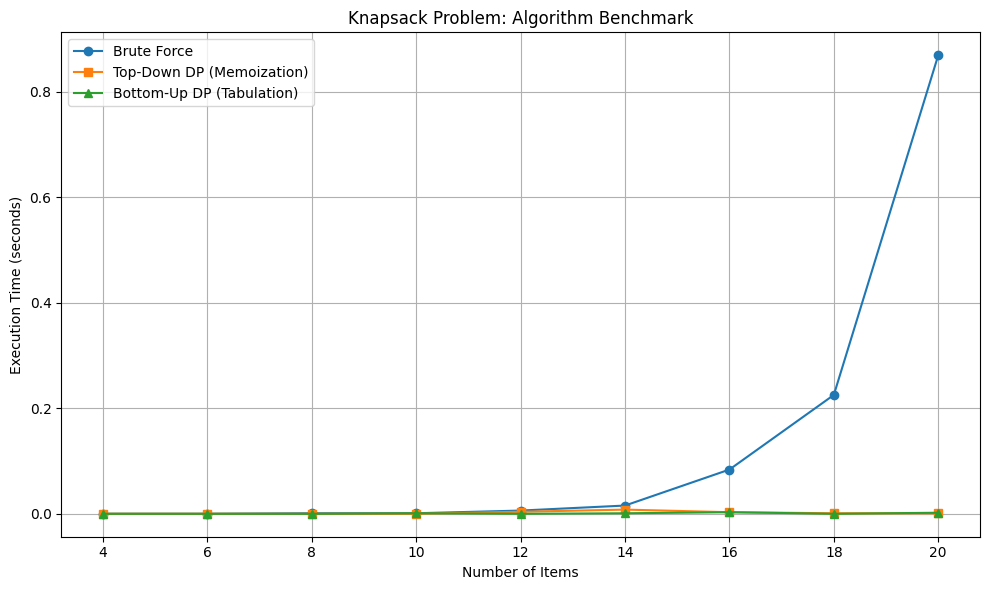

In [7]:
plt.figure(figsize=(10,6))
plt.plot(item_sizes, brute_times, 'o-', label='Brute Force')
plt.plot(item_sizes, topdown_times, 's-', label='Top-Down DP (Memoization)')
plt.plot(item_sizes, bottomup_times, '^-', label='Bottom-Up DP (Tabulation)')
plt.xlabel('Number of Items')
plt.ylabel('Execution Time (seconds)')
plt.title('Knapsack Problem: Algorithm Benchmark')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Results Summary and Analysis

The benchmark results, visualized in the plot above, provide a clear comparison of the three algorithms for solving the 0/1 Knapsack problem as the number of items increases:

### Brute Force
- **Performance:** The brute force approach quickly becomes impractical as the number of items grows. Its execution time increases exponentially, which is why it is only benchmarked up to 20 items.
- **Reason:** This method explores all possible subsets of items, resulting in a time complexity of O(2^n). For even moderately sized problems, the number of combinations becomes too large to handle efficiently.

### Top-Down Dynamic Programming (Memoization)
- **Performance:** The top-down DP approach with memoization is significantly faster than brute force. It can handle larger problem sizes within reasonable time limits.
- **Reason:** By storing the results of subproblems in a memoization table, this method avoids redundant calculations. Its time complexity is O(n * W), where n is the number of items and W is the knapsack capacity.

### Bottom-Up Dynamic Programming (Tabulation)
- **Performance:** The bottom-up DP approach is the most efficient, especially as the problem size increases. It consistently outperforms the other two methods for larger numbers of items.
- **Reason:** This method builds up a solution iteratively using a DP table, eliminating recursion overhead and further optimizing memory access patterns. Like the top-down approach, its time complexity is O(n * W), but it is generally faster in practice due to its iterative nature.

---

**Conclusion:**  
The results demonstrate that while brute force is only suitable for very small instances, both dynamic programming approaches scale much better. Bottom-up DP is the preferred method for large-scale knapsack problems due to its superior efficiency and scalability. This highlights the importance of algorithm selection when dealing with combinatorial optimization problems.
